# Project

Author: Andrew Peterson (acpeterson7@wisc.edu)

## Part 1: Regression

Cross Sectional data file downloaded from [Denver Government](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-real-property-residential-characteristics).

file needed = 'real_property_residential_characteristics.csv' 

## Part 2: Population

The data file was downloaded from the [U.S. Census website](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage). 

file needed = 'pop.csv'

## Part 3: Evolution of Price

Time Series data files downloaded from [Zillow](https://www.zillow.com/research/data/). I used the home values section to get my data. This section calculates and compares the average price of homes by state, county, and city. 

files needed = 'state.csv', 'county.csv', 'city.csv'

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
%matplotlib inline    
import pandas_datareader.data as web
import statsmodels.formula.api as smf

## Part 1: Regression

In [2]:
# load in the data from Denver's website.
df1 = pd.read_csv('real_property_residential_characteristics.csv', dtype={'OWNER': str}, low_memory=False)
# df1 = pd.read_csv('real_property_residential_characteristics.csv', dtype={'OWNER': str})
df1.head()

,PARID,CD,OFCARD,OWNER,CO_OWNER,OWNER_NUM,OWNER_DIR,OWNER_ST,OWNER_TYPE,OWNER_APT,...,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1,NBHD_1_CN,LEGL_DESCRIPTION
0,3110004000,1,5.0,WILLIAM LYON HOMES INC,NaN,400.0,NaN,INVERNESS,PWKY,350,...,5.0,132000,1749400,9170,121580,121580,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 1 L4
1,3111001000,1,4.0,WILLIAM LYON HOMES INC,NaN,400.0,NaN,INVERNESS,PWKY,350,...,4.0,72800,236200,5060,16420,16420,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L1
2,3111002000,1,6.0,WILLIAM LYON HOMES INC,NaN,400.0,NaN,INVERNESS,PWKY,350,...,6.0,101800,350200,7080,24340,24340,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L2
3,3111003000,1,4.0,WILLIAM LYON HOMES INC,NaN,400.0,NaN,INVERNESS,PWKY,350,...,4.0,99200,275200,6890,19120,19120,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L3
4,3111007000,1,1.0,"OGUNLOWO,KYANDRA",NaN,6497.0,N,CEYLON,ST,NaN,...,1.0,53200,338900,3700,23560,23560,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L7


In [3]:
# remove unneeded columns
columns_to_remove = ['PARID','CD', 'OFCARD', 'OWNER', 'CO_OWNER', 'OWNER_NUM', 'OWNER_DIR', 'OWNER_ST', 'OWNER_TYPE', 'OWNER_APT', 'OWNER_CITY', 'OWNER_STATE','OWNER_ZIP', 'SITE_NBR', 'SITE_DIR', 'SITE_NAME', 'SITE_MODE', 'SITE_MORE']
df1 = df1.drop(columns_to_remove, axis = 1)
df1.head()

,TAX_DIST,PROP_CLASS_LAND,PROP_CLASS_IMPS,PROP_CLASS,ZONE10,D_CLASS_CN,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,...,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1,NBHD_1_CN,LEGL_DESCRIPTION
0,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,15400,1484,0,0,...,5.0,132000,1749400,9170,121580,121580,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 1 L4
1,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,7747,1342,0,0,...,4.0,72800,236200,5060,16420,16420,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L1
2,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,11538,1518,0,0,...,6.0,101800,350200,7080,24340,24340,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L2
3,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,11160,1484,0,0,...,4.0,99200,275200,6890,19120,19120,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L3
4,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,SFR Grade C,5193,1241,1241,0,...,1.0,53200,338900,3700,23560,23560,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L7


In [4]:
# rename columns
col_names = {'TAX_DIST': 'tax_district', 'PROP_CLASS_LAND': 'property_class_land', 'PROP_CLASS': 'property_class', 'D_CLASS_CN': 'property_use_class', 'LAND_SQFT': 'land_sqft', 'AREA_ABG': 'area_above_ground', 'BSMT_AREA':'basement_area', 'FBSMT_SQFT': 'finished_basement_area'}
df1 = df1.rename(columns=col_names)
df1.head()

,tax_district,property_class_land,PROP_CLASS_IMPS,property_class,ZONE10,property_use_class,land_sqft,area_above_ground,basement_area,finished_basement_area,...,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1,NBHD_1_CN,LEGL_DESCRIPTION
0,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,15400,1484,0,0,...,5.0,132000,1749400,9170,121580,121580,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 1 L4
1,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,7747,1342,0,0,...,4.0,72800,236200,5060,16420,16420,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L1
2,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,11538,1518,0,0,...,6.0,101800,350200,7080,24340,24340,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L2
3,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,11160,1484,0,0,...,4.0,99200,275200,6890,19120,19120,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L3
4,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,SFR Grade C,5193,1241,1241,0,...,1.0,53200,338900,3700,23560,23560,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L7


In [5]:
# restrict prop class to single family residence
df1 = df1[df1['property_class'] == 'SINGLE FAMILY RESIDENCE']
df1.head()

,tax_district,property_class_land,PROP_CLASS_IMPS,property_class,ZONE10,property_use_class,land_sqft,area_above_ground,basement_area,finished_basement_area,...,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1,NBHD_1_CN,LEGL_DESCRIPTION
0,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,15400,1484,0,0,...,5.0,132000,1749400,9170,121580,121580,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 1 L4
1,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,7747,1342,0,0,...,4.0,72800,236200,5060,16420,16420,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L1
2,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,11538,1518,0,0,...,6.0,101800,350200,7080,24340,24340,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L2
3,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,RESIDENTIAL-ROWHOUSE,11160,1484,0,0,...,4.0,99200,275200,6890,19120,19120,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L3
4,435C,1112.0,1212.0,SINGLE FAMILY RESIDENCE,R-MU-20,SFR Grade C,5193,1241,1241,0,...,1.0,53200,338900,3700,23560,23560,0,4,GATEWAY N,HIGH POINT SUB FLG #3 BLK 2 L7


In [6]:
# regress assess_value land_sqft area_abg bsmt_area fbsmt_sqft bed_rms full_b hlf_b ccyrblt
model = 'ASSESS_VALUE ~ land_sqft + area_above_ground + basement_area + finished_basement_area + BED_RMS + FULL_B + HLF_B + CCYRBLT' 
result1 = smf.ols(model, data=df1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:           ASSESS_VALUE   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 4.390e+04
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:37:33   Log-Likelihood:            -1.7588e+06
No. Observations:              159141   AIC:                         3.518e+06
Df Residuals:                  159132   BIC:                         3.518e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.29

In [7]:
# regress TOTAL_VALUE land_sqft area_abg bsmt_area fbsmt_sqft bed_rms full_b hlf_b ccyrblt
model = 'TOTAL_VALUE ~ land_sqft + area_above_ground + basement_area + finished_basement_area + BED_RMS + FULL_B + HLF_B + CCYRBLT' 
result2 = smf.ols(model, data=df1).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL_VALUE   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 4.390e+04
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:37:33   Log-Likelihood:            -2.1831e+06
No. Observations:              159141   AIC:                         4.366e+06
Df Residuals:                  159132   BIC:                         4.366e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.73

## Part 2: Population

In [8]:
# load the population data
df2 = pd.read_csv('pop.csv')
df2.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [9]:
# select the columns that will be used
cols = ['NAME','CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019' ]
pop = df2[cols]
pop.head()

,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,United States,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast Region,55317240,55318443,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,Midwest Region,66927001,66929725,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,South Region,114555744,114563030,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,West Region,71945553,71946907,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268


In [10]:
# rename columns
names = { 'NAME': 'name', 'CENSUS2010POP': 'census 2010 pop', 'ESTIMATESBASE2010': 'estimates base 2010', 'POPESTIMATE2010': '2010', 'POPESTIMATE2011': '2011', 'POPESTIMATE2012': '2012', 'POPESTIMATE2013': '2013', 'POPESTIMATE2014': '2014', 'POPESTIMATE2015': '2015', 'POPESTIMATE2016': '2016', 'POPESTIMATE2017': '2017', 'POPESTIMATE2018': '2018', 'POPESTIMATE2019': '2019'}
pop = pop.rename(columns=names)
pop.head()

,name,census 2010 pop,estimates base 2010,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast Region,55317240,55318443,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,Midwest Region,66927001,66929725,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,South Region,114555744,114563030,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,West Region,71945553,71946907,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268


In [11]:
# select Colorado
pop = pop[pop['name'] == 'Colorado']
pop

,name,census 2010 pop,estimates base 2010,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
10,Colorado,5029196,5029319,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736


In [12]:
# reset index
pop = pop.reset_index()
pop.head()

,index,name,census 2010 pop,estimates base 2010,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,10,Colorado,5029196,5029319,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736


In [13]:
# transpose data
pop = pop.transpose()
pop.head()

,0
index,10
name,Colorado
census 2010 pop,5029196
estimates base 2010,5029319
2010,5047349


In [14]:
# remove first 4 rows
pop = pop.drop(['index', 'name', 'census 2010 pop', 'estimates base 2010'])
pop.head()

,0
2010,5047349
2011,5121108
2012,5192647
2013,5269035
2014,5350101


In [15]:
# rename column
pop = pop.rename(columns={0: 'population'})
pop.head()

,population
2010,5047349
2011,5121108
2012,5192647
2013,5269035
2014,5350101


In [16]:
# reset index
pop = pop.reset_index()
pop.head()

,index,population
0,2010,5047349
1,2011,5121108
2,2012,5192647
3,2013,5269035
4,2014,5350101


In [17]:
# create column with date-time index
pop['index'] = pd.to_datetime(pop['index'])
pop.head()

,index,population
0,2010-01-01,5047349
1,2011-01-01,5121108
2,2012-01-01,5192647
3,2013-01-01,5269035
4,2014-01-01,5350101


In [18]:
# rename column and set index to proper date-time format
pop = pop.rename(columns={'index': 'date'})
pop = pop.set_index(['date'])
pop.head()

,population
date,
2010-01-01,5047349
2011-01-01,5121108
2012-01-01,5192647
2013-01-01,5269035
2014-01-01,5350101


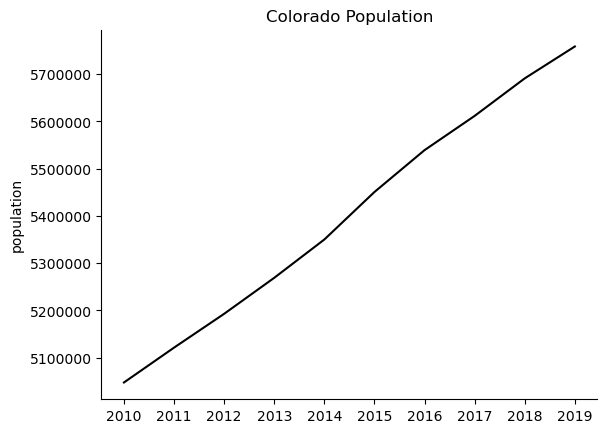

In [19]:
# plot the population in colorado
fig, ax = plt.subplots() 
plt.ticklabel_format(style='plain')
ax.plot(pop.index, pop['population'], color='black')  
ax.set_ylabel('population')  
ax.set_title('Colorado Population')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
plt.show()

## Part 3: Evolution of Price

### State

In [20]:
# load the state price data from zillow
state = pd.read_csv('state.csv')
state.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,9,0,California,State,CA,202744.0,203606.0,204690.0,206971.0,209417.0,...,677568.0,696320.0,710135.0,720036.0,725067.0,730580.0,737410.0,747660.0,759840.0,774899.0
1,54,1,Texas,State,TX,114109.0,114234.0,114273.0,114480.0,114529.0,...,251448.0,257104.0,262775.0,267628.0,271901.0,275537.0,279800.0,284463.0,289905.0,295319.0
2,43,2,New York,State,NY,148975.0,149737.0,150374.0,151718.0,152933.0,...,352114.0,357721.0,362532.0,366549.0,369590.0,372459.0,375299.0,378578.0,382341.0,387069.0
3,14,3,Florida,State,FL,116274.0,116617.0,116980.0,117685.0,118355.0,...,296250.0,304232.0,312319.0,320255.0,327674.0,335023.0,341864.0,349456.0,357423.0,367175.0
4,21,4,Illinois,State,IL,147631.0,147955.0,148395.0,149261.0,150153.0,...,232170.0,235639.0,239047.0,241589.0,243829.0,246095.0,248604.0,250960.0,253330.0,256010.0


In [21]:
# select colorado
colorado = state[state['RegionName']=='Colorado']
colorado

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
21,10,21,Colorado,State,CO,186656.0,187565.0,188427.0,190372.0,192298.0,...,489519.0,501429.0,511160.0,518895.0,525719.0,532944.0,541193.0,549982.0,559580.0,569952.0


In [22]:
# transpose dataframe
colorado = colorado.transpose()
colorado.head()

,21
RegionID,10
SizeRank,21
RegionName,Colorado
RegionType,State
StateName,CO


In [23]:
# delete unnecessary rows
delete_rows = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
colorado = colorado.drop(delete_rows, axis = 0)
colorado.head(2)

,21
2000-01-31,186656.0
2000-02-29,187565.0


In [24]:
# rename column to price
colorado = colorado.rename(columns={21: 'price'})
colorado.head(2)

,price
2000-01-31,186656.0
2000-02-29,187565.0


In [25]:
# reset index
colorado = colorado.reset_index()
colorado

,index,price
0,2000-01-31,186656.0
1,2000-02-29,187565.0
2,2000-03-31,188427.0
3,2000-04-30,190372.0
4,2000-05-31,192298.0
...,...,...
262,2021-11-30,532944.0
263,2021-12-31,541193.0
264,2022-01-31,549982.0
265,2022-02-28,559580.0


In [26]:
# rename column
colorado = colorado.rename(columns={'index':'date'})
colorado.head()

,date,price
0,2000-01-31,186656.0
1,2000-02-29,187565.0
2,2000-03-31,188427.0
3,2000-04-30,190372.0
4,2000-05-31,192298.0


In [27]:
# create column with proper date-time format
colorado['date'] = pd.to_datetime(colorado['date'])
colorado.head()

,date,price
0,2000-01-31,186656.0
1,2000-02-29,187565.0
2,2000-03-31,188427.0
3,2000-04-30,190372.0
4,2000-05-31,192298.0


In [28]:
# set index
colorado = colorado.set_index('date')
colorado.head()

,price
date,
2000-01-31,186656.0
2000-02-29,187565.0
2000-03-31,188427.0
2000-04-30,190372.0
2000-05-31,192298.0


In [29]:
# downsample data
state_avg_yearly = colorado.resample('y').mean()
state_avg_yearly.head()

,price
date,
2000-12-31,195958.250000
2001-12-31,219288.666667
2002-12-31,231194.000000
2003-12-31,235698.333333
2004-12-31,240586.250000


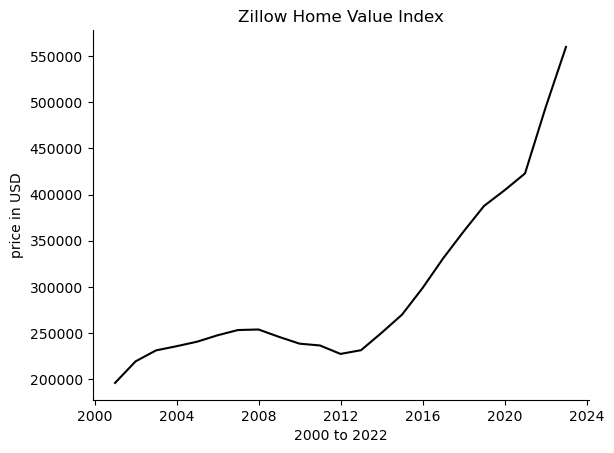

In [30]:
# plot the average price of a home in colorado

fig, ax = plt.subplots() 

ax.plot(state_avg_yearly.index, state_avg_yearly, color='black')  

ax.set_ylabel('price in USD')  
ax.set_xlabel('2000 to 2022')
ax.set_title('Zillow Home Value Index')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.show()

### County

In [31]:
# load county data
county = pd.read_csv('county.csv')
county

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,217262.0,...,768098.0,788101.0,800150.0,808817.0,811357.0,815924.0,821299.0,826486.0,834932.0,849633.0
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,177992.0,...,282996.0,286586.0,290384.0,293009.0,295534.0,298474.0,301243.0,303854.0,305637.0,308249.0
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,114993.0,...,232801.0,238159.0,243931.0,248343.0,252130.0,254718.0,257783.0,260976.0,264603.0,269303.0
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,144317.0,...,387068.0,400443.0,410502.0,418777.0,426330.0,432474.0,438257.0,444047.0,452792.0,462122.0
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,229073.0,...,765864.0,789895.0,804648.0,814441.0,819215.0,826807.0,838226.0,858817.0,879278.0,902655.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,425,3101,Camas County,County,ID,ID,Hailey,16,25,NaN,...,181431.0,183364.0,185999.0,187724.0,190012.0,190928.0,196742.0,201491.0,207170.0,209468.0
2822,1648,3102,Daggett County,County,UT,UT,NaN,49,9,NaN,...,258901.0,262598.0,267125.0,271249.0,275611.0,278336.0,285251.0,290604.0,294774.0,294673.0
2823,2345,3112,Hinsdale County,County,CO,CO,NaN,8,53,NaN,...,375851.0,378292.0,382807.0,386622.0,390146.0,390870.0,396505.0,403534.0,410519.0,412991.0
2824,1933,3122,Mineral County,County,CO,CO,NaN,8,79,NaN,...,326381.0,332436.0,338005.0,343148.0,346653.0,347743.0,350019.0,351941.0,353780.0,353333.0


In [32]:
# select denver county
county = county[county['RegionName']=='Denver County']
county

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
105,989,105,Denver County,County,CO,CO,Denver-Aurora-Lakewood,8,31,196070.0,...,546353.0,559937.0,569329.0,576060.0,581329.0,589031.0,597827.0,605940.0,614710.0,627840.0


In [33]:
# transpose dataframe
county = county.transpose()
county.head()

,105
RegionID,989
SizeRank,105
RegionName,Denver County
RegionType,County
StateName,CO


In [34]:
# delete unnecessary rows
delete_rows_county = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS']
county = county.drop(delete_rows_county, axis = 0)
county.head(2)

,105
2000-01-31,196070.0
2000-02-29,197523.0


In [35]:
# rename columns
county = county.rename(columns={105: 'price'})
county.head(2)

,price
2000-01-31,196070.0
2000-02-29,197523.0


In [36]:
# reset index
county = county.reset_index()
county.head()

,index,price
0,2000-01-31,196070.0
1,2000-02-29,197523.0
2,2000-03-31,198838.0
3,2000-04-30,202182.0
4,2000-05-31,205184.0


In [37]:
# rename column to price
county = county.rename(columns={'index': 'date'})
county.head(2)

,date,price
0,2000-01-31,196070.0
1,2000-02-29,197523.0


In [38]:
# create column with date-time format
county['date'] = pd.to_datetime(county['date'])
county.head()

,date,price
0,2000-01-31,196070.0
1,2000-02-29,197523.0
2,2000-03-31,198838.0
3,2000-04-30,202182.0
4,2000-05-31,205184.0


In [39]:
# set index with date-time column
county = county.set_index(['date'])
county.head()

,price
date,
2000-01-31,196070.0
2000-02-29,197523.0
2000-03-31,198838.0
2000-04-30,202182.0
2000-05-31,205184.0


In [40]:
# downsample data
county_avg_yearly = county.resample('y').mean()
county_avg_yearly.head()

,price
date,
2000-12-31,209619.916667
2001-12-31,240202.916667
2002-12-31,255958.000000
2003-12-31,258945.250000
2004-12-31,264145.166667


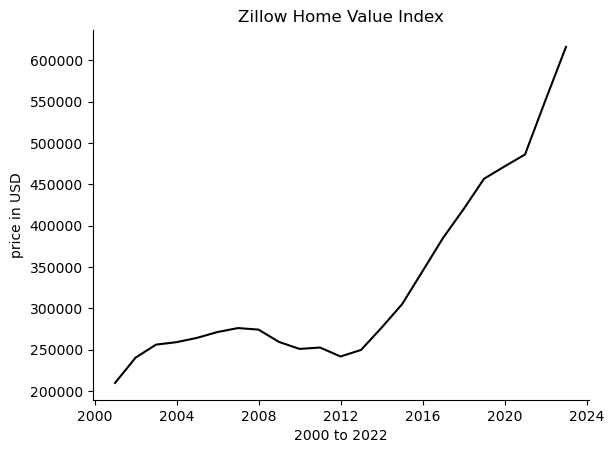

In [41]:
# plot the average price of a home in denver county

fig, ax = plt.subplots() 

ax.plot(county_avg_yearly.index, county_avg_yearly, color='black')  

ax.set_ylabel('price in USD')  
ax.set_xlabel('2000 to 2022')
ax.set_title('Zillow Home Value Index')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.show()

### City

In [42]:
# load city data from zillow
city = pd.read_csv('city.csv')
city.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,252701.0,254520.0,...,711720.0,716349.0,721313.0,727207.0,732201.0,735891.0,738692.0,742776.0,747650.0,753782.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,237081.0,237303.0,...,876405.0,898997.0,912715.0,922531.0,925407.0,929815.0,935460.0,940493.0,949548.0,965684.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,108945.0,108955.0,...,222419.0,227346.0,232692.0,236787.0,240316.0,242730.0,245503.0,248436.0,251793.0,256143.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,168395.0,168797.0,...,292262.0,294721.0,297793.0,299858.0,301899.0,304491.0,306932.0,309246.0,310564.0,312489.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,116080.0,116262.0,...,244883.0,250291.0,256005.0,259832.0,263958.0,267630.0,272340.0,277101.0,281583.0,287310.0


In [43]:
# select city of Denver
city = city[(city['RegionName']=='Denver') & (city['State']=='CO')]
city

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
23,11093,23,Denver,City,CO,CO,Denver-Aurora-Lakewood,Denver County,195753.0,197209.0,...,545585.0,559148.0,568553.0,575285.0,580573.0,588270.0,597077.0,605243.0,614060.0,627189.0


In [44]:
# transpose dataframe
city = city.transpose()
city

,23
RegionID,11093
SizeRank,23
RegionName,Denver
RegionType,City
StateName,CO
...,...
2021-11-30,588270.0
2021-12-31,597077.0
2022-01-31,605243.0
2022-02-28,614060.0


In [45]:
# delete unneccesary rows
delete_rows3 = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName']
city = city.drop(delete_rows3, axis = 0)
city.head()

,23
2000-01-31,195753.0
2000-02-29,197209.0
2000-03-31,198520.0
2000-04-30,201843.0
2000-05-31,204827.0


In [46]:
# rename column
city = city.rename(columns={23:'price'})
city.head()

,price
2000-01-31,195753.0
2000-02-29,197209.0
2000-03-31,198520.0
2000-04-30,201843.0
2000-05-31,204827.0


In [47]:
# reset index
city = city.reset_index()
city

,index,price
0,2000-01-31,195753.0
1,2000-02-29,197209.0
2,2000-03-31,198520.0
3,2000-04-30,201843.0
4,2000-05-31,204827.0
...,...,...
262,2021-11-30,588270.0
263,2021-12-31,597077.0
264,2022-01-31,605243.0
265,2022-02-28,614060.0


In [48]:
# rename column
city = city.rename(columns={'index':'date'})
city.head()

,date,price
0,2000-01-31,195753.0
1,2000-02-29,197209.0
2,2000-03-31,198520.0
3,2000-04-30,201843.0
4,2000-05-31,204827.0


In [49]:
# convert date column to date-time format
city['date'] = pd.to_datetime(city['date'])
city.head()

,date,price
0,2000-01-31,195753.0
1,2000-02-29,197209.0
2,2000-03-31,198520.0
3,2000-04-30,201843.0
4,2000-05-31,204827.0


In [50]:
# set index
city = city.set_index('date')
city.head()

,price
date,
2000-01-31,195753.0
2000-02-29,197209.0
2000-03-31,198520.0
2000-04-30,201843.0
2000-05-31,204827.0


In [51]:
# downsample the data
city_avg_yearly = city.resample('y').mean()
city_avg_yearly.head()

,price
date,
2000-12-31,209274.333333
2001-12-31,239785.666667
2002-12-31,255382.083333
2003-12-31,258359.083333
2004-12-31,263518.750000


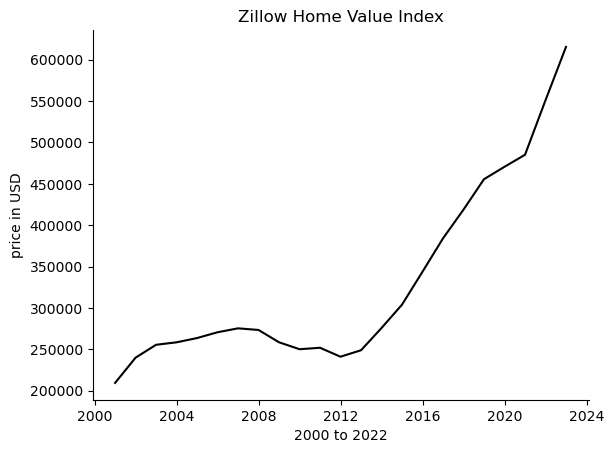

In [52]:
# plot the average price of a home in city of denver

fig, ax = plt.subplots() 

ax.plot(city_avg_yearly.index, city_avg_yearly, color='black')  

ax.set_ylabel('price in USD')  
ax.set_xlabel('2000 to 2022')
ax.set_title('Zillow Home Value Index')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.show()

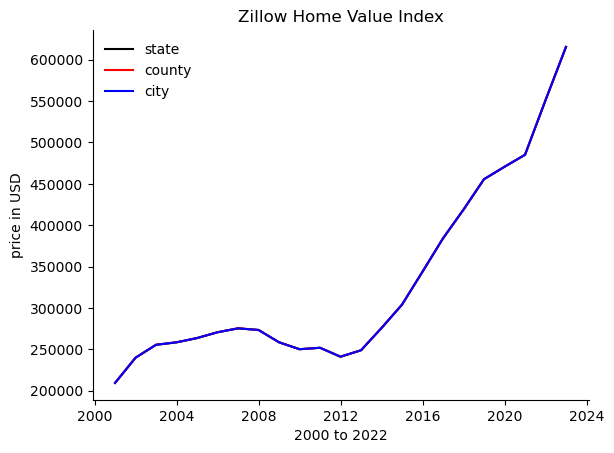

In [53]:
# graph state, county and city averages to see if there are any differences

fig, ax = plt.subplots() 

ax.plot(state_avg_yearly.index, city_avg_yearly, color='black', label='state')  
ax.plot(county_avg_yearly.index, city_avg_yearly, color='red', label='county')  
ax.plot(city_avg_yearly.index, city_avg_yearly, color='blue', label='city')  


ax.set_ylabel('price in USD')  
ax.set_xlabel('2000 to 2022')
ax.set_title('Zillow Home Value Index')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

ax.legend(frameon=False)  

plt.show()
